# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [13]:
bivariada = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
print(bivariada)

flag_doente    0    1  All
sex                       
0.0           72   25   97
1.0           92  114  206
All          164  139  303


In [20]:
saudaveis = bivariada[0][:-1]
doentes = bivariada[1][:-1]
total = bivariada['All'][:-1]
qtd_media_doentes = doentes / total
odds = doentes / saudaveis
odds_total = tabela_bivariada[1]['All'] / tabela_bivariada[0]['All']
odds_ratio = odds / odds_total
logito = np.log(odds)
woe = np.log(odds_ratio)

In [22]:
resultado = pd.DataFrame({
    'saudaveis': saudaveis,
    'doentes': doentes,
    'total': total,
    'qtd_media_doentes': qtd_media_doentes,
    'odds': odds,
    'odds_ratio': odds_ratio,
    'logito': logito,
    'woe': woe
})

resultado

,saudaveis,doentes,total,qtd_media_doentes,odds,odds_ratio,logito,woe
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [23]:
df['age_group'] = pd.cut(df['age'], bins=5)

In [24]:
bivariada_age = df.groupby('age_group').agg(
    saudaveis = ('flag_doente', lambda x: (x==0).sum()),
    doentes = ('flag_doente', lambda x: (x==1).sum()),
    total = ('flag_doente', 'count'),
    qtd_media_doentes = ('flag_doente', 'mean'),
    idade_media = ('age', 'mean')
)

bivariada_age

C:\Users\henri\AppData\Local\Temp\ipykernel_2440\1580660759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age = df.groupby('age_group').agg(


,saudaveis,doentes,total,qtd_media_doentes,idade_media
age_group,,,,,
"(28.952, 38.6]",8,3,11,0.272727,35.181818
"(38.6, 48.2]",50,21,71,0.295775,43.704225
"(48.2, 57.8]",56,41,97,0.422680,53.567010
"(57.8, 67.4]",40,67,107,0.626168,61.775701
"(67.4, 77.0]",10,7,17,0.411765,70.529412


In [28]:
bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']

odds_total = df['flag_doente'].sum() / (df['flag_doente']==0).sum()
bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total
bivariada_age['logito'] = np.log(bivariada_age['odds'])
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

bivariada_age

,saudaveis,doentes,total,qtd_media_doentes,idade_media,odds,odds_ratio,logito,woe
age_group,,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,35.181818,0.375000,0.442446,-0.980829,-0.815437
"(38.6, 48.2]",50,21,71,0.295775,43.704225,0.420000,0.495540,-0.867501,-0.702108
"(48.2, 57.8]",56,41,97,0.422680,53.567010,0.732143,0.863823,-0.311780,-0.146387
"(57.8, 67.4]",40,67,107,0.626168,61.775701,1.675000,1.976259,0.515813,0.681206
"(67.4, 77.0]",10,7,17,0.411765,70.529412,0.700000,0.825899,-0.356675,-0.191282


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

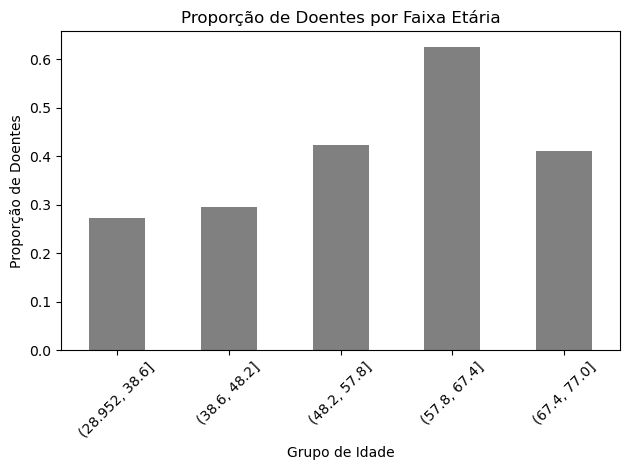

In [34]:
bivariada_age['qtd_media_doentes'].plot(kind='bar', color='gray')
plt.ylabel('Proporção de Doentes')
plt.xlabel('Grupo de Idade')
plt.title('Proporção de Doentes por Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()